In [108]:
# This should be roughly the content of the first code cell
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

# Plotting support
from matplotlib import pyplot as plt
# from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk
import tensorflow as tf
import time
import os
from skimage import io
import cv2
from scipy import stats
from skimage.util import compare_images
from PIL import Image
from skimage.metrics import mean_squared_error, structural_similarity, hausdorff_distance, normalized_root_mse, peak_signal_noise_ratio
plt.rc('image', cmap='gray')

In [2]:
genuine_processed = np.load('training/genuine_processed.npy')
forged_processed = np.load('training/forged_processed.npy')

In [3]:
genuine_labels = np.load('training/genuine_labels.npy')
forged_labels = np.load('training/forged_labels.npy')


In [4]:
signature = genuine_processed[0]
genuine_sig = genuine_processed[1]
forged_sid = forged_processed[0]

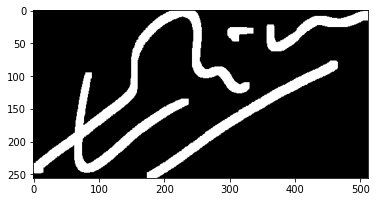

In [5]:
plt.imshow(signature)

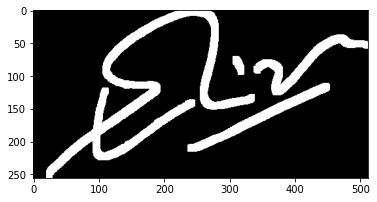

In [6]:
plt.imshow(genuine_sig)

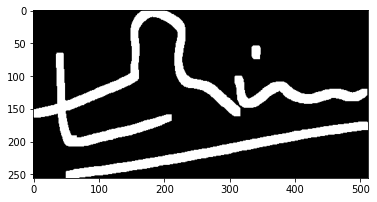

In [7]:
plt.imshow(forged_sid)

In [8]:
def compare_signatures(image1, image2):
    diff = compare_images(image1, image2, method='diff')
    checkerboard = compare_images(image1, image2, method='checkerboard')
    blend = compare_images(image1, image2, method='blend')
    # print(diff, checkerboard, blend)
    print(np.mean(diff), np.mean(checkerboard), np.mean(blend))

    plt.imshow(diff)
    plt.show()
    plt.imshow(checkerboard)
    plt.show()
    plt.imshow(blend)

0.0 0.155975341796875 0.155975341796875


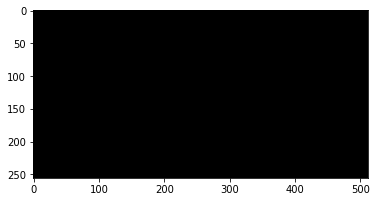

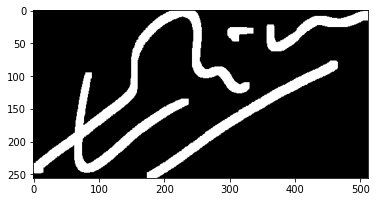

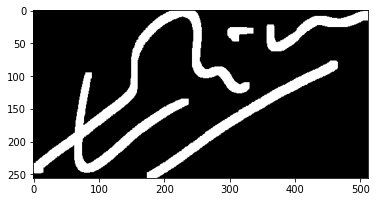

In [9]:
compare_signatures(signature, signature)

0.24916839599609375 0.140655517578125 0.15448379516601562


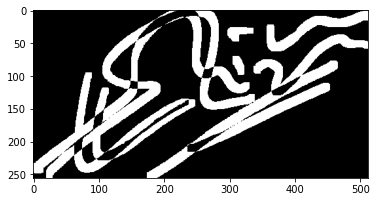

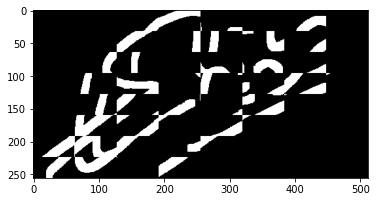

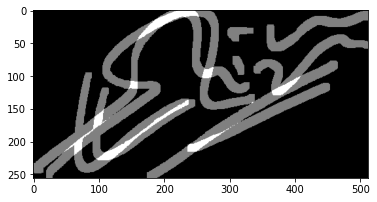

In [10]:
compare_signatures(signature, genuine_sig)

0.26436614990234375 0.14452362060546875 0.16145706176757812


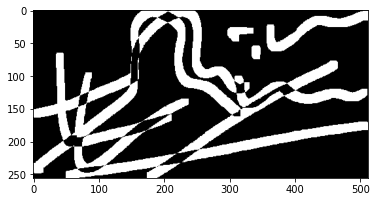

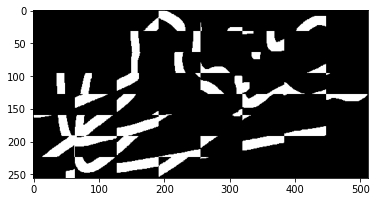

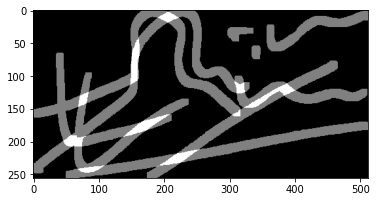

In [11]:
compare_signatures(signature, forged_sid)

(32659.0, 391.0)

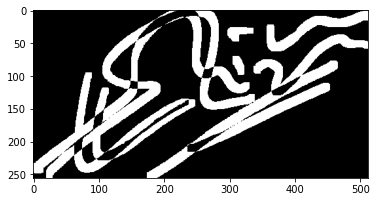

In [15]:
simple_diff = np.abs(signature - genuine_sig)
plt.imshow(simple_diff)
np.sum(simple_diff), np.sum(signature - genuine_sig)

(0.0, 0.0)

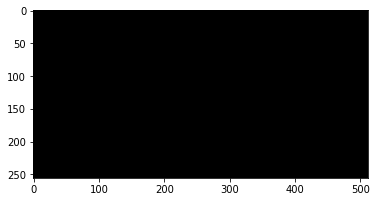

In [16]:
simple_diff = np.abs(signature - signature)
plt.imshow(simple_diff)
np.sum(simple_diff), np.sum(signature - signature)

3919

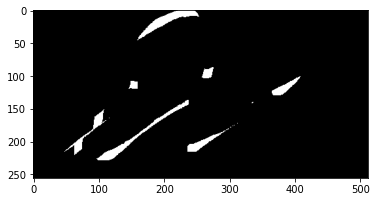

In [30]:
log_and = np.logical_and(signature, genuine_sig)
plt.imshow(log_and)
np.sum(log_and)

20444

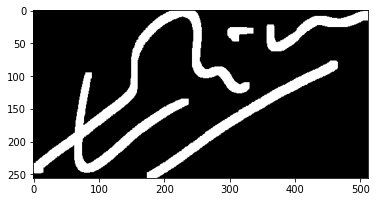

In [31]:
log_and = np.logical_and(signature, signature)
plt.imshow(log_and)
np.sum(log_and)

3837

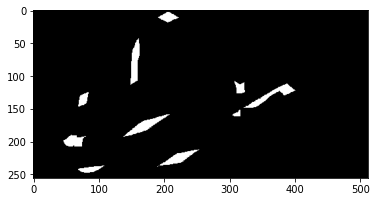

In [32]:
log_and = np.logical_and(signature, forged_sid)
plt.imshow(log_and)
np.sum(log_and)

In [ ]:
# padded = np.zeros((signature.shape[0]*2, signature.shape[1]*2))
# padded.shape

In [19]:
# padded[:256, :512] = signature

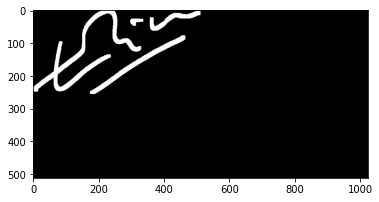

In [20]:
# plt.imshow(padded)

In [23]:
# padded[16:256+16, 16:512+16] = signature

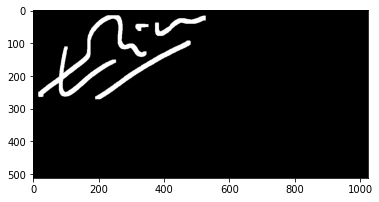

In [24]:
# plt.imshow(padded)

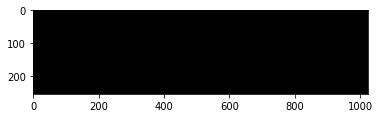

In [33]:
padded = np.zeros((256, 512*2))
plt.imshow(padded)

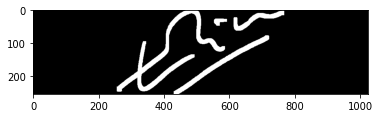

In [45]:
centered = np.zeros((256, 512*2))
centered[:, 256:768] = signature
plt.imshow(centered)

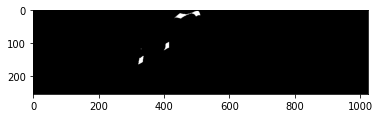

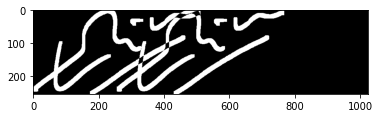

38800.0


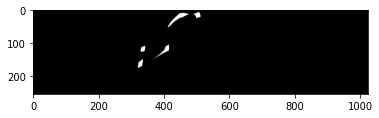

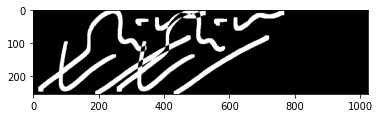

37628.0


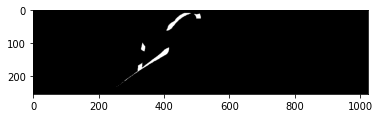

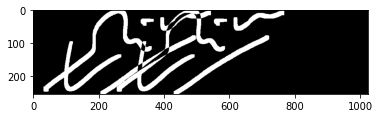

36046.0


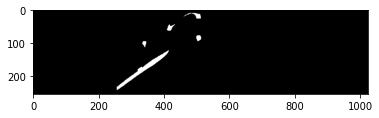

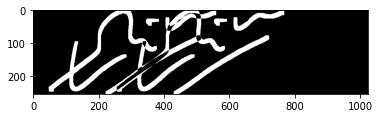

34626.0


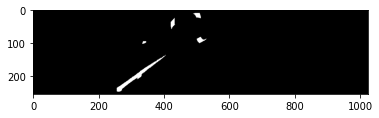

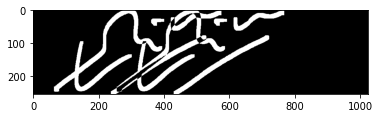

35914.0


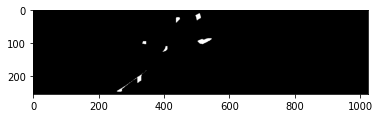

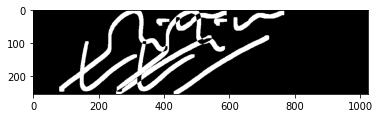

38084.0


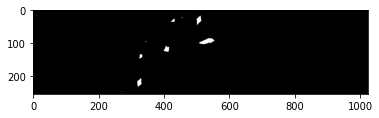

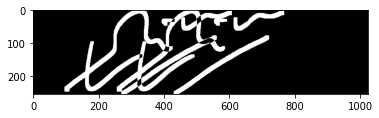

38266.0


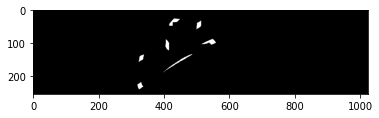

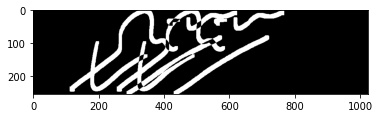

37030.0


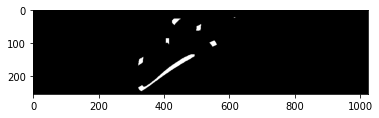

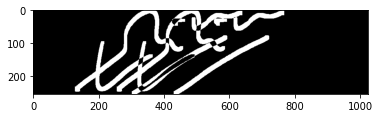

34748.0


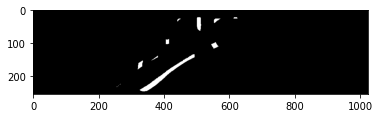

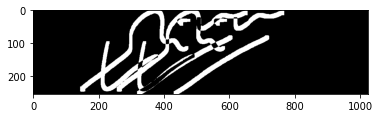

33758.0


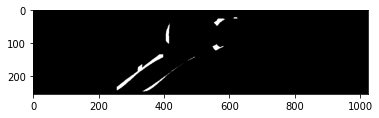

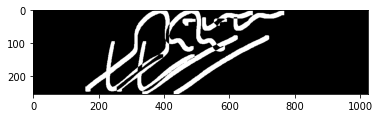

34332.0


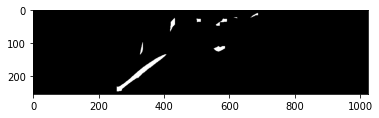

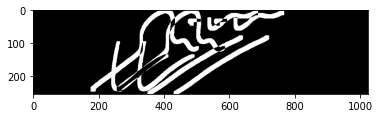

33922.0


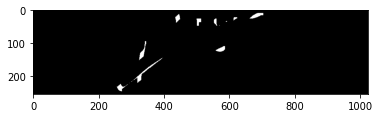

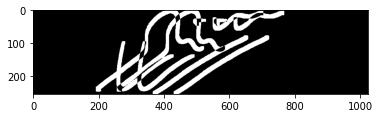

35894.0


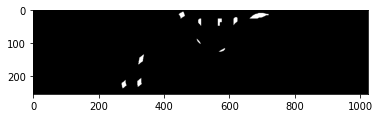

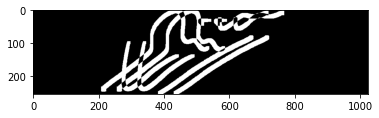

36470.0


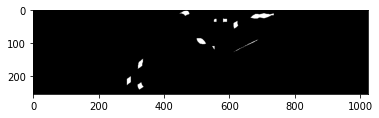

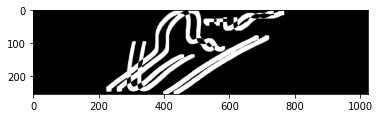

35776.0


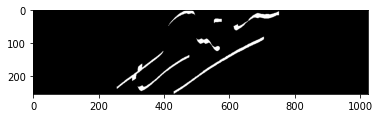

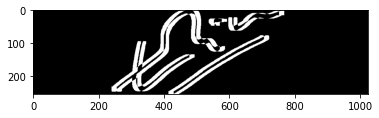

25706.0


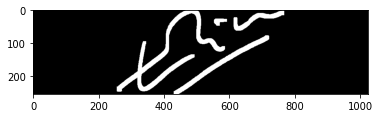

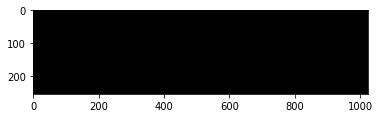

0.0


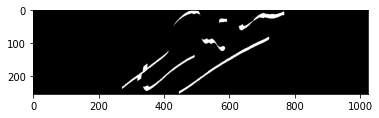

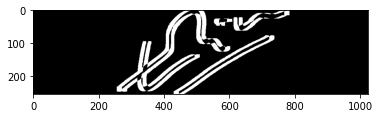

25706.0


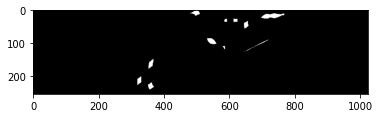

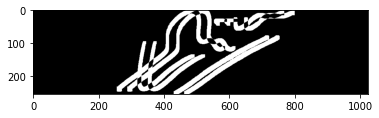

35776.0


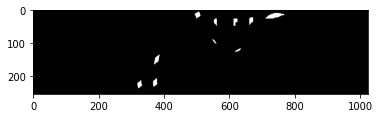

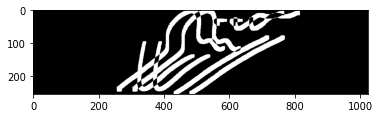

36470.0


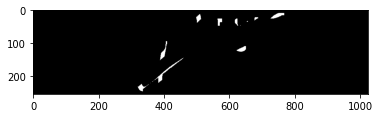

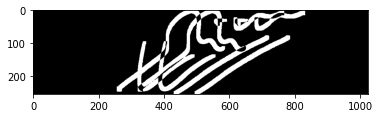

35894.0


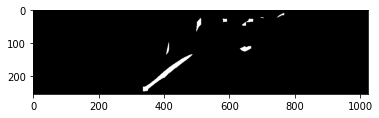

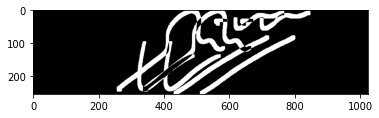

33922.0


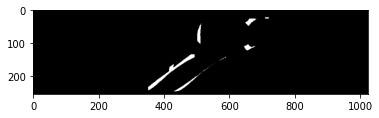

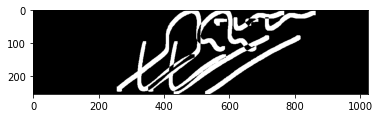

34332.0


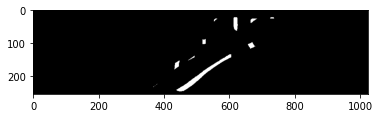

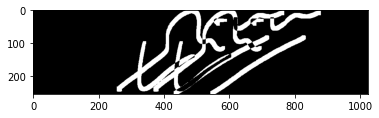

33758.0


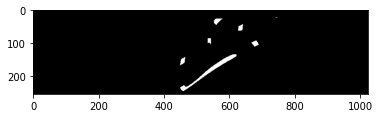

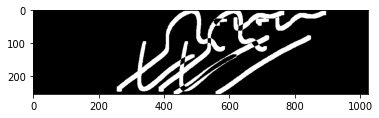

34748.0


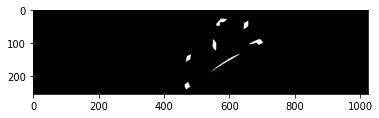

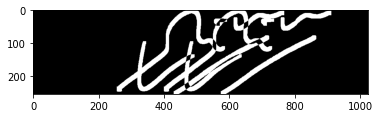

37030.0


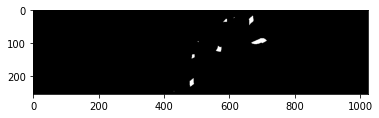

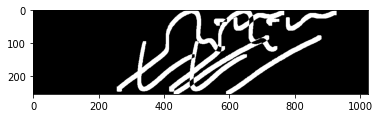

38266.0


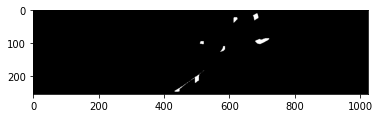

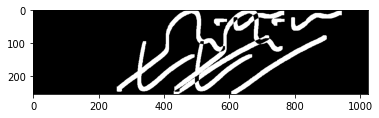

38084.0


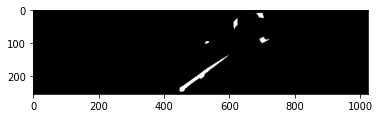

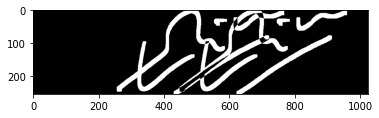

35914.0


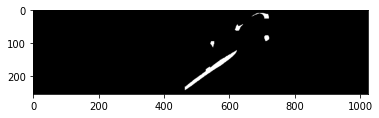

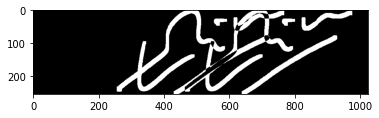

34626.0


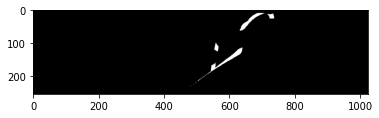

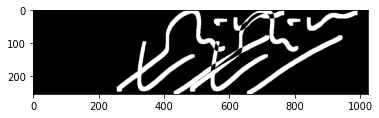

36046.0


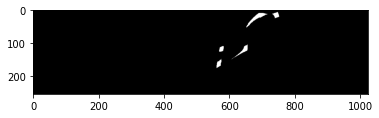

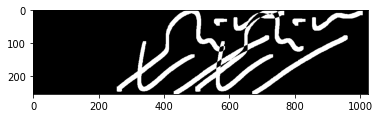

37628.0


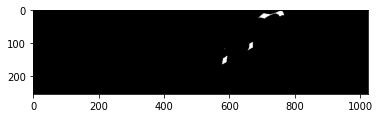

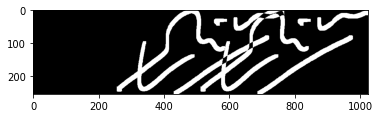

38800.0
20444 0.0


In [58]:
max_and = 0
min_simple_diff =262144
for i in range(33):
    padded = np.zeros((256, 512*2))

    padded[:, i*16 : i*16+512] = signature

    log_and = np.logical_and(centered, padded)

    plt.imshow(log_and)
    plt.show()

    sum = np.sum(log_and)
    if sum > max_and:
        max_and = sum

    simple_diff = np.abs(centered - padded)
    plt.imshow(simple_diff)
    plt.show()
    sum_simple_diff = np.sum(simple_diff)
    if sum_simple_diff < min_simple_diff:
        min_simple_diff = sum_simple_diff
print(max_and, min_simple_diff)

In [63]:
mean_squared_error(signature, signature)

0.0

In [71]:
ssim(signature, signature, data_range=1)

1.0

In [64]:
mean_squared_error(signature, genuine_sig)

0.24916839599609375

In [70]:
ssim(signature, genuine_sig, data_range=1)

0.592746792272586

In [66]:
mean_squared_error(signature, forged_sid)

0.26436614990234375

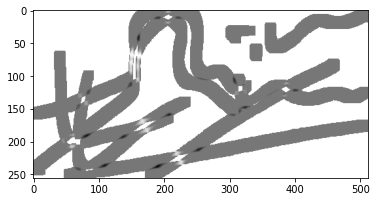

In [77]:
ssm = structural_similarity(signature, forged_sid, data_range=1, full=True)
plt.imshow(ssm[1])


In [104]:
def get_comparison_metrics(image1, image2):
    mse = mean_squared_error(image1, image2)
    ssim = structural_similarity(image1, image2, data_range=1)
    log_and = np.sum(np.logical_and(image1, image2))
    simple_diff = np.sum(np.abs(image1-image2))

    checkerboard = compare_images(image1, image2, method='checkerboard')
    blend = compare_images(image1, image2, method='blend')
    checkerboard_mean = np.mean(checkerboard)
    blend_mean = np.mean(blend)

    hd = hausdorff_distance(image1, image2)
    nrmse = normalized_root_mse(image1, image2)

    psnr = peak_signal_noise_ratio(image1, image2)

    return [mse, ssim, log_and, simple_diff, checkerboard_mean, blend_mean, hd, nrmse, psnr]
